In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [3]:
# Program ini menyajikan machine learning yang digunakan untuk memprediksi harga rumah
# 1 untuk meload data
data_location = '../content/harga_rumah.csv'
row_data = pd.read_csv(data_location)
row_data.shape # untuk menampilkan data

(545, 4)

In [4]:
# membaca data 5 teratas
row_data.head()

,harga,luas,kasur,km
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [5]:
df = row_data.dropna(axis=0) # membersihkan data yang tidak lengkap (Jika ada)
df.describe()

,harga,luas,kasur,km
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [6]:
print(df.dtypes) # untuk menampilkan apa tipe datanya

harga    int64
luas     int64
kasur    int64
km       int64
dtype: object


In [7]:
# menentukan variabel independen dan dependen
# menamilkan variabel independen
x = df.drop(["harga"],axis = 1)
x.head()

,luas,kasur,km
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [8]:
#Menampilkan data varibel dependen
y = df["harga"]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: harga, dtype: int64

In [9]:
#membagi data untuk training dan testing
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

In [10]:
# membangun model dengan algoritma K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 1)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  2939243422018.3486 
 Accuracy:  0.08317841890050015


In [11]:
# menggunakan elbow method untuk menentukan nilai K terbaik
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

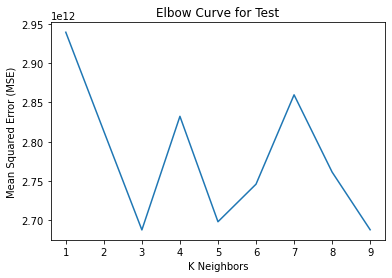

In [12]:
# menampilkan grafik nilai k berdasarkan MSE
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [13]:
# Melakukan improvisasi dengan menerapkan nilai k yang menghasilkan MSE minimum
new_model  = KNN_Reg(n_neighbors = 3)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 16.159822698296843 
 Accuracy of old model (%): 8.317841890050016 
 Improvement (%): 7.841980808246829


In [18]:
data_harga_rumah = np.array([[8000,4,2]])
pred_old = model.predict(data_harga_rumah)
pred_new = new_model.predict(data_harga_rumah)

print(' Hasil Prediksi harga rumah dengan old model: Rp', pred_old, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: Rp', pred_new, 'Juta')

 Hasil Prediksi harga rumah dengan old model: Rp [6020000.] Juta
 Hasil Prediksi harga rumah dengan new model: Rp [5553333.33333333] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
